In [11]:
# 서울 교통공사 역 정보 데이터 가져오기
# 총 288개 역

import pandas as pd

data = pd.read_csv('서울교통공사_역주소 및 전화번호_20220331.csv', encoding='cp949')     # csv 파일 읽기
data.head()            # 상위 5개 확인

,연번,역번호,호선,역명,역전화번호,도로명주소,지번주소
0,1,150,1,서울,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선)
1,2,151,1,시청,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선)
2,3,152,1,종각,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선)
3,4,153,1,종로3가,02-6110-1301,서울특별시 종로구 종로 지하129(종로3가),서울특별시 종로구 종로3가 10-5 종로3가역(1호선)
4,5,154,1,종로5가,02-6110-1291,서울특별시 종로구 종로 지하216(종로5가),서울특별시 종로구 종로5가 82-1 종로5가역(1호선)


In [12]:
data.tail()          # 하위 5개 확인

,연번,역번호,호선,역명,역전화번호,도로명주소,지번주소
283,284,4134,9,송파나루,02-2656-0934,서울특별시 송파구 백제고분로 지하446(방이동),서울특별시 송파구 방이동 2 송파나루역(9호선)
284,285,4135,9,한성백제,02-2656-0935,서울특별시 송파구 위례성대로 지하29(방이동),서울특별시 송파구 방이동 88-17 한성백제역(9호선)
285,286,4136,9,올림픽공원(한국체대),02-2656-0936,서울특별시 송파구 양재대로 지하1233(방이동),서울특별시 송파구 방이동 89-28 올림픽공원역(9호선)
286,287,4137,9,둔촌오륜,02-2656-0937,서울특별시 강동구 강동대로 지하303(둔촌동),서울특별시 강동구 둔촌동 227-7 둔촌오륜역(9호선)
287,288,4138,9,중앙보훈병원,02-2656-0938,서울특별시 강동구 동남로 지하625(둔촌동),서울특별시 강동구 둔촌동 8-1 중앙보훈병원역(9호선)


In [13]:
# 필요한 열 추출

data = data[['연번','호선','역명', '도로명주소']]
data

,연번,호선,역명,도로명주소
0,1,1,서울,서울특별시 중구 세종대로 지하2(남대문로 5가)
1,2,1,시청,서울특별시 중구 세종대로 지하101(정동)
2,3,1,종각,서울특별시 종로구 종로 지하55(종로1가)
3,4,1,종로3가,서울특별시 종로구 종로 지하129(종로3가)
4,5,1,종로5가,서울특별시 종로구 종로 지하216(종로5가)
...,...,...,...,...
283,284,9,송파나루,서울특별시 송파구 백제고분로 지하446(방이동)
284,285,9,한성백제,서울특별시 송파구 위례성대로 지하29(방이동)
285,286,9,올림픽공원(한국체대),서울특별시 송파구 양재대로 지하1233(방이동)
286,287,9,둔촌오륜,서울특별시 강동구 강동대로 지하303(둔촌동)


In [14]:
# 주소에서 구 parsing
address_split = data["도로명주소"].str.split(" ")
data["지역(시)"] = address_split.str.get(0)
data["지역(구)"] = address_split.str.get(1)
data

,연번,호선,역명,도로명주소,지역(시),지역(구)
0,1,1,서울,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시,중구
1,2,1,시청,서울특별시 중구 세종대로 지하101(정동),서울특별시,중구
2,3,1,종각,서울특별시 종로구 종로 지하55(종로1가),서울특별시,종로구
3,4,1,종로3가,서울특별시 종로구 종로 지하129(종로3가),서울특별시,종로구
4,5,1,종로5가,서울특별시 종로구 종로 지하216(종로5가),서울특별시,종로구
...,...,...,...,...,...,...
283,284,9,송파나루,서울특별시 송파구 백제고분로 지하446(방이동),서울특별시,송파구
284,285,9,한성백제,서울특별시 송파구 위례성대로 지하29(방이동),서울특별시,송파구
285,286,9,올림픽공원(한국체대),서울특별시 송파구 양재대로 지하1233(방이동),서울특별시,송파구
286,287,9,둔촌오륜,서울특별시 강동구 강동대로 지하303(둔촌동),서울특별시,강동구


In [17]:
# 서울 지역이 아닌 역이 있는지 확인
data[data['지역(시)'].str.contains('서울특별시', na = False) == False]

,연번,호선,역명,도로명주소,지역(시),지역(구)
60,61,3,지축,경기도 고양시 덕양구 삼송로 300(지축동),경기도,고양시
172,173,5,미사,경기도 하남시 미사강변동로 지하90(망월동),경기도,하남시
173,174,5,하남풍산,경기도 하남시 덕풍서로 지하50(덕풍동),경기도,하남시
174,175,5,하남시청(덕풍 신장),경기도 하남시 하남대로 지하820(덕풍동),경기도,하남시
175,176,5,하남검단산,경기도 하남시 대청로 지하100(창우동),경기도,하남시
215,216,7,장암,경기도 의정부시 동일로 121(장암동),경기도,의정부시
253,254,7,철산,경기도 광명시 철산로 지하13(철산동),경기도,광명시
254,255,7,광명사거리,경기도 광명시 오리로 지하980(광명동),경기도,광명시
268,269,8,남위례,경기도 성남시 수정구 공원로 601(복정동),경기도,성남시
269,270,8,산성,경기도 성남시 수정구 수정로 지하365(신흥동),경기도,성남시


In [21]:
# 서울 지역 지하철 역 sorting
data= data[data['지역(시)'].str.contains('서울특별시')]
data

,연번,호선,역명,도로명주소,지역(시),지역(구)
0,1,1,서울,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시,중구
1,2,1,시청,서울특별시 중구 세종대로 지하101(정동),서울특별시,중구
2,3,1,종각,서울특별시 종로구 종로 지하55(종로1가),서울특별시,종로구
3,4,1,종로3가,서울특별시 종로구 종로 지하129(종로3가),서울특별시,종로구
4,5,1,종로5가,서울특별시 종로구 종로 지하216(종로5가),서울특별시,종로구
...,...,...,...,...,...,...
283,284,9,송파나루,서울특별시 송파구 백제고분로 지하446(방이동),서울특별시,송파구
284,285,9,한성백제,서울특별시 송파구 위례성대로 지하29(방이동),서울특별시,송파구
285,286,9,올림픽공원(한국체대),서울특별시 송파구 양재대로 지하1233(방이동),서울특별시,송파구
286,287,9,둔촌오륜,서울특별시 강동구 강동대로 지하303(둔촌동),서울특별시,강동구


In [22]:
# 필요 없는 열 제거
data = data[['연번','호선','역명','지역(구)']]
data

,연번,호선,역명,지역(구)
0,1,1,서울,중구
1,2,1,시청,중구
2,3,1,종각,종로구
3,4,1,종로3가,종로구
4,5,1,종로5가,종로구
...,...,...,...,...
283,284,9,송파나루,송파구
284,285,9,한성백제,송파구
285,286,9,올림픽공원(한국체대),송파구
286,287,9,둔촌오륜,강동구


In [23]:
# 지역별 집계
grouped = data.groupby('지역(구)')['역명'].count()
grouped

지역(구)
강남구     21
강동구     14
강북구      3
강서구      9
관악구      4
광진구     11
구로구      7
금천구      1
노원구     13
도봉구      3
동대문구     6
동작구     12
마포구     16
서대문구     5
서초구     12
성동구     14
성북구      9
송파구     28
양천구      5
영등포구    11
용산구     10
은평구     13
종로구     15
중구      23
중랑구      8
Name: 역명, dtype: int64

In [24]:
# 데이터 시각화

import matplotlib.pyplot as plt 
sorted_grouped = grouped.sort_values(ascending=False)   # 많은 순서대로 sorting
sorted_grouped

지역(구)
송파구     28
중구      23
강남구     21
마포구     16
종로구     15
강동구     14
성동구     14
은평구     13
노원구     13
서초구     12
동작구     12
영등포구    11
광진구     11
용산구     10
성북구      9
강서구      9
중랑구      8
구로구      7
동대문구     6
서대문구     5
양천구      5
관악구      4
도봉구      3
강북구      3
금천구      1
Name: 역명, dtype: int64

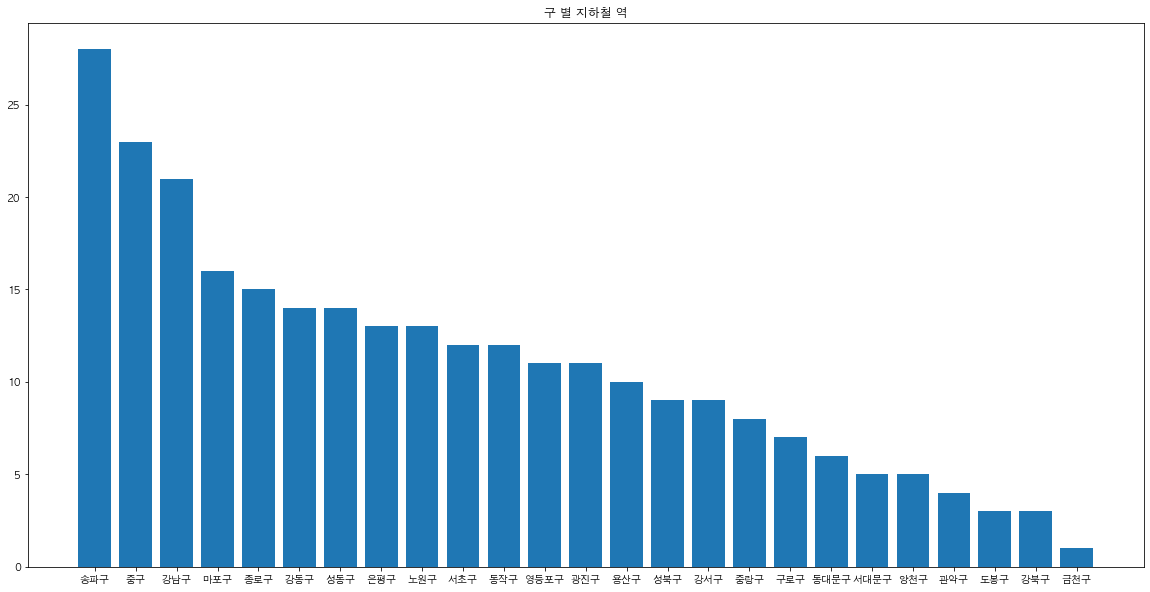

In [25]:
plt.rcParams['font.family'] = "AppleGothic"    # 한글 폰트 설정
plt.figure(figsize= (20,10))                    # 그래프의 사이즈
plt.bar(sorted_grouped.index, sorted_grouped)
plt.title('구 별 지하철 역')                 # 그래프의 제목
plt.xticks(rotation=0)
plt.show() 